<a id='Top'/a>
# Class 12: Advanced User Interface - Widgets!
[Top of Notebook](#Top)

## Learning Objectives: 

Finally, we come to the last notebook of the class. This past week we've looked at advanced data input, including APIs and web scraping. We sampled advanced analysis, including statistics, image processing and machine learning. In this final notebook we'll take a quick look at graphical user interfaces. 

What is a Graphical User Interface, or GUI for short? Well, until now all your interaction with programs has been through typing. Yet modern software involves pointing, clicking, dragging, selecting from menus, pushing buttons, etc. Adding this level of interaction can make programs more user-friendly, but is is a lot more work for the programmer! In this notebook we'll introduce the idea of using "widgets" for user interaction. An introduction is as far as we'll get in this class, but there are loads of tutorials on the web, so explore further on you own!

In this class we will look at:
- [Event Handlers](#Events)
- [Student Challenge 1](#Student1)
- [Student Challenge 2](#Student2)
- [World's Simplest Calculator](#Calculator)
- [Student Challenge 3](#Student3)
- [Checkboxes, Dropdowns, and Radio Buttons](#MoreWidgets)
- [Interactive Widgets](#Interactive)
- [Widget Properties](#Properties)
- [Student Challenge 4](#Student4)
- [Arranging Widgets](#Arrange)
- [Martian Weather GUI](#Weather)
- [Class Summary](#Back)

<a id='Events' /a>
## Event Handlers
[Top of Notebook](#Top)

To program with widgets you need to understand the idea of an event handler. Until now, all of your programs have executed from the first line of code on though to the last. Oh sure, if statements sent execution down one branch or another. Loops sent execution round and round. Functions jumped off the main branch to do some task, then returned to the main program. But basically, you knew the order in which your code would execute. 

With GUIs you are handing control over to the user. Users are scary! Users are perverse! You don't know in what order they will press buttons, move sliders, or click on things. Instead of executing from the top down, your code has to respond to events. **An event is a mouse click, a button press, typing a value into an input box, selecting from a menu -- any way in which the user interacts graphically with your program.** Each event will trigger a "callback" to your code. Python will tell you what was clicked -- it will "call back" to you saying, "Hey, someone moron (er, user) pushed this button. What should I do?" You need to write a function to handle each user event such that it doesn't matter in what order they were triggered.

Let's begin our journey with a simple widget. We'll start with a single button. The user pushes it and you control what happens next.

In [4]:
from ipywidgets import widgets
from IPython.display import display

print('What to know how to keep an idiot busy? Click the button to find out.')
button = widgets.Button(description='Click me.')
display(button)

What to know how to keep an idiot busy? Click the button to find out.


### You may have noticed this button doesn't do anything.
We have a button, but clicking on it does nothing because there is no callback. Let's add a function that is called when a button-click event is detected.

In [5]:
from ipywidgets import widgets
from IPython.display import display

button = widgets.Button(description='Click me.')
display(button)

def on_button_clicked(b):
    print('Button clicked.')
    
button.on_click(on_button_clicked)

### How it works
You created a button widget and displayed it. Every widget has as variety of methods build into it. A button, has an "on_click" event that is triggered when the button is clicked. You passed that method your callback function. So every time the user clicks the button the callback function with that name is triggered. In this case the callback function simply prints the "Button clicked" message. Click the button repeatedly, the message prints repeatedly, because every click is a new event that triggers a callback.

<a id='Student1' /a>
## Student Challenge 1
[Top of Notebook](#Top)
Create a button with the label "Do not push." And a callback function that prints "Kaboom!!!" if the button is pushed.

## Text Input Widget
The basic pattern of widget and callback is the same. See if you can figure how this widget works. In this case we create two widgets.  You type into the top one and see the result in the bottom one.

In [6]:
top_box_text = widgets.Text()
bot_box_text = widgets.Text()
display(top_box_text)
display(bot_box_text)

def make_upper_case(sender):
    bot_box_text.value = top_box_text.value.upper()
    
top_box_text.on_submit(make_upper_case)

Notice that we only have a callback defined for the top box, so typing text into the bottom one doesn't do anything when you hit enter. Don't believe me? Try typing some text in the bottom box.

<a id='Student2' /a>
## Student Challenge 2
[Top of Notebook](#Top)
Duplicate the function above, but alter it so that not only is text typed in the upper box output in lower box in upper case, but text typed in the lower box is printed in the upper box in lower case.

<a id='Calculator' /a>
## World's simplest calculator.
[Top of Notebook](#Top)

Let's take the two widgets we know and design a really, really simple calculator. You enter a number in each of the top two boxes, press the button, and the sum is displayed in the bottom box.

In [7]:
# Create four widgets, 3 text widgets and one button
num1 = widgets.Text()
num2 = widgets.Text()
button = widgets.Button(description='Add')
answer = widgets.Text()

# Display the widgets
display(num1)
display(num2)
display(button)
display(answer)

# Callback function
def add_it(sender):
    answer.value = str(float(num1.value) + float(num2.value))

# Event that will trigger a callback
button.on_click(add_it)

We defined four widgets: three text boxes and a button, but we only wrote a callback for the button, so nothing will execute until the user presses the button.

There is one trick here. The value of a text box is always a string even when you type in numbers; so when we want to work with numbers we have to convert them.  If you have a string "7.9", float("7.9") will return the floating point number 7.9. 

But textboxes can only display strings, so after you add the values together you need to convert the sum back into a string. The str() function does this, so str(7.9) will convert the number 7.9 into the string "7.9". Stare at he function until your understand what it does or you eyes start to bleed.

<a id='Student3' /a>
## Student Challenge 3
[Top of Notebook](#Top)

Acutally, we didn't need the string-float conversion for our simple calculator because one of the widgets available is widgets.FloatText(), which accepts floating point numbers instead of text. See if you can rewrite the calculator above using this widget in place of widgets.Text(). The code should be slightly simpler. 

This is another example of refactoring your code -- you are improving it without changing functionality.

<a id='MoreWidgets' /a>
## Three more widgets: Checkboxes, Dropdowns, RadioButtons
[Top of Notebook](#Top)

A check box is used for true/false. A dropdown is used to select a choice from a list. A radiobutton is used to select from mutually exclusive options. Here are examples of each.

In [8]:
# Check box. Try checking and unchecking the box.
# Notice we are using the callback function f defined earlier that prints it's argument.
cb = widgets.Checkbox()
display(cb)

In [9]:
# Dropdown for making choices. Click on the down arrow to see the options.
dd = widgets.Dropdown(options=('Orange', 'Green', 'Blue'))
display(dd)

In [10]:
# Radiobutton. By default only on option can be selected.
rb = widgets.RadioButtons(
        options=['pepperoni', 'pineapple', 'mushrooms'], description="Pizza topping:")
display(rb)

The full list of widgets available can be found [here](http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Complete-list).

<a id='Interactive' /a>
## Interactive Widgets
[Top of Notebook](#Top)

Apart from the default widgets there is also “interact” which automatically generates a widget based on the arguments that you use.  At the most basic level, interact autogenerates controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. To use interact, you need to define a function that you want to explore. Here is a function that prints its only argument x.

In [11]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets

def f(x):
    print(x)
interact(f, x=widgets.IntSlider(min=-10,max=30,step=1,value=10))

10


<function __main__.f>

Notice how we set the range of the slider, in this case from -10 to 30 in steps of 1, and set the starting value to 10. As you move the slider it generates events that trigger new function calls to print the current value.

<a id='Properties' /a>
## Widget Properties
[Top of Notebook](#Top)

You may have noticed that these are not the most colorful widgets. All of the widgets have some properties that can be adjusted. Let's explicitly create a Dropdown widget and look at its properties.

In [12]:
from ipywidgets import Layout
cw = widgets.Dropdown(options=['Red', 'Green', 'Blue'])
display(cw)

In [13]:
# print the properties of this widget
print(cw.keys)

['_dom_classes', '_model_module', '_model_name', '_options_labels', '_view_module', '_view_name', 'background_color', 'button_style', 'color', 'description', 'disabled', 'font_family', 'font_size', 'font_style', 'font_weight', 'layout', 'msg_throttle', 'value', 'visible']


Notice that one of the properties is 'button_style.' Great, but what are the choices? Figuring this this out requires browsing the [online documentation.](http://ipywidgets.readthedocs.io/en/latest/index.html) The choices are:  button_style='', # 'success', 'info', 'warning', 'danger' or ''

In [14]:
# Adjust the button style to use 'info'
cw = widgets.Dropdown(options=['Red', 'Green', 'Blue'], button_style='info')
display(cw)


<a id='Student4' /a>
## Student Challenge 4
[Top of Notebook](#Top)

Create a button with the words "Do Not Push!" in the 'danger' style. (Inspired by Guardians of the Galazy 2).  You cand decide what happens when you bush it. (Though I'd prefer it not end the universe.)

![Baby Groot](http://i.dailymail.co.uk/i/pix/2016/12/04/01/3B02A5EF00000578-3998002-I_am_Groot_Unfortunately_the_cute_little_character_has_a_hard_ti-m-10_1480815975438.jpg)

<a id='Arrange' /a>
## Arranging Widgets
[Top of Notebook](#Top)

A GUI with more than a few widgets requires some control over the widget layout. This is accomplished with container widgets. Two of the simplest container widgets are Hbox and Vbox for stacking widgets horizontally and vertically. Here is a simple exaample:

In [15]:
from ipywidgets import Button, HBox, VBox

words = ['MAV', 'Rover', 'Battery', 'Rations']
items = [Button(description=w) for w in words]

HBox([VBox([items[0], items[1]]), VBox([items[2], items[3]])])

Let's look line by line at how this code works because it demonstrates many of the skills we've learned over the past few weeks. See how much you understand.

Line 1: We import objects we need form an external module named "ipywidgets." (Importing modules)

Line 2: We create a list of strings we plan to use as Button labels. (Using a list)

Line 3: We create a loop over the items in the list. For each item we create a button, assign the test string to the description, and add the button to a new list called "items" that hold the four buttons, one for each item in our original list. (Looping)

Line 4: We create two vertical containers (Vbox) inside one horizontal container (Hbox). In the first Vbox we put items 0 and 1 (Python list indices always start with zero), and in the second Vbox we put items 3 and 4. These items are our labeled buttons. The two Vboxes go into the Hbox. Look carefully at the parentheses and you'll see this.

Note that we have no callback, so none of the buttons actually does anything...

![Dust Storm](https://www.nasa.gov/sites/default/files/thumbnails/image/21_the_serpent_dust_devil_on_mars_pia15116-br2.jpg)
"A towering [dust devil](https://www.nasa.gov/feature/goddard/the-fact-and-fiction-of-martian-dust-storms) casts a serpentine shadow over the Martian surface in this image acquired by the High Resolution Imaging Science Experiment (HiRISE) camera on NASA's Mars Reconnaissance Orbiter."

<a id='Weather' /a>
# Martian Weather GUI
[Top of Notebook](#Top)

We've learned how to make a widget, implement callbacks and arrange widgets.  Let's finish this whole programming module by building a simple GUI App inside this notebook -- with a Martian theme, naturally!

We will look at weather data from the Mars Pathfinder
Reference: http://www-k12.atmos.washington.edu/k12/resources/mars_data-information/data.html
(Open the URL in a separate tab.)

The data set description shows the following columns

    Year			    Mars year, approximately 687 Earth days
    Solar Longitude,	Angular direction from Mars to the Sun, L_s in 0 to 360 degrees
    Deg.                90 = summer, 180 = autumn, 270 = winter, 0 or 360 = spring in northern hemisphere
    Sol			        Martian days after landing; 1 sol is Viking landed on sol 0. One sol is 24.62 hours
    Wind speed		    Meters per second
    Wind direction	    Degrees, (direction from which the wind blows)
    Pressure		    mb = millibars, 1 mb = 100 hPa, where hPa = hecta Pascals
    Temperature		    Degrees; C = Centigrade; F = Fahrenheit

We are going to design an application that will let Whatney plot weather data from the Mars Pathfinder.

**Design Requirements:**
* Start date (0-189) - Slider widget to chose the starting day of the plot
* Date range (0-10) - Slider widget to chose the number of days of data to plot
* Quantity to plot - Dropdown widget to choose which variable to plot
* Plot it - a button to press when you are ready to plot the data with the updated parameter values

We well use container widgets to control the layout.

*Let's start by loading and looking at the data.*

In [16]:
%matplotlib inline
import pandas as pd

# If you look at the text file you'll see that the first 69 lines are text
# describing the data, so we have to skip that.
mpf = pd.read_csv('MPF.txt', delim_whitespace=True, skiprows=69, header=0)

In [17]:
# Print the first few lines
mpf.head()

,Year,L_s,Sol,Wind_vel,Wind_dir,Pressure,Temp_F,Temp_C
0,1,97.196,1.02,1.2,176,7.71,-108.90,-78.28
1,1,97.215,1.06,2.5,190,7.70,-113.98,-81.10
2,1,97.233,1.10,1.9,214,7.70,-117.33,-82.96
3,1,97.251,1.14,2.5,225,7.71,-119.88,-84.38
4,1,97.270,1.18,2.5,219,7.70,-121.72,-85.40


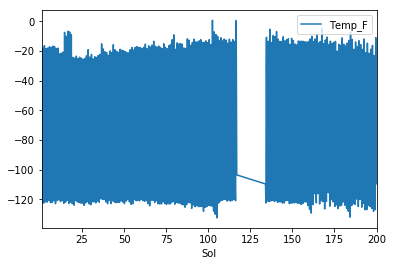

In [18]:
# Make quick plot of all the data
mpf.plot('Sol','Temp_F')

It appears there was a period of time when the equipment was not operating. Also it is clear you can't see much if you plot all of the data at once.

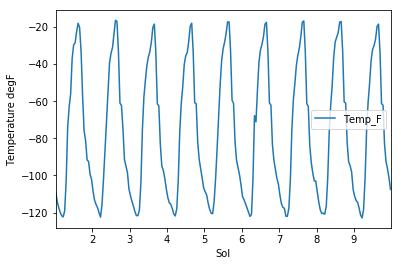

In [19]:
# Plot just 10 days of data
mpf10days = mpf[mpf['Sol']<10]
ax = mpf10days.plot('Sol','Temp_F')
ax.set_ylabel('Temperature degF')

The temperature data for 10 days shows us two things: (1) the temperature goes up and down with the rising and setting of the sun each Martian day; (2) it is fricking cold on Mars!

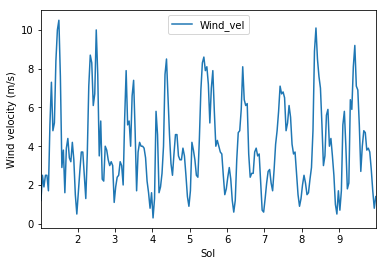

In [20]:
ax = mpf10days.plot('Sol','Wind_vel')
ax.set_ylabel('Wind velocity (m/s)')

The wind velocity also changes with a daily cycle, but it is more irregular. Some days are windier then others.

## GUI Design
This is probably the longest piece of code you've had to look at this entire class. Remember, in this final week I'm showing you some advanced stuff, so don't worry if you don't understand it all, but make the attempt anyway. 

Bragging rights if you can figure out how it all works.

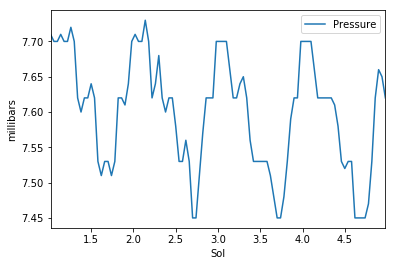

In [22]:
%matplotlib inline

# Import the modules needed
import numpy as np
import pandas as pd
from IPython import display
from ipywidgets import widgets 
from IPython.display import display, clear_output, Image

# Create the widgets

# Slider to pick the starting day
start_sol = widgets.FloatSlider(
    value=1.0,
    min=0.0,
    max=189.0,
    step=1.0,
    description='Start Sol:',
    continuous_update = False
)

# Slider to pick the number of days to plot
ndays = widgets.FloatSlider(
    value=1.0,
    min=1.0,
    max=10.0,
    step=1.0,
    description='Num Days:',
    continuous_update = False
)

# Dropdown box to choose what to plot
data_types = ['Wind_vel', 'Wind_dir', 'Pressure', 'Temp_F', 'Temp_C']
units = ['m/s', 'degrees', 'millibars', 'deg F', 'deg C']
data2plot = widgets.Dropdown(options=data_types, button_style='info')

# Button to update the plot
button = widgets.Button(description='Update Plot', button_style='primary')

# Create the dashboard layout by putting widgets in containers
container1 = widgets.VBox([start_sol, ndays])
container2 = widgets.VBox([button, data2plot])
dashboard = widgets.HBox([container1, container2])
display(dashboard)

# Create the callback function for the button press
def on_button_clicked(b):
    from IPython import display
    
    # Clear the output cell - if we don't do this we'll get multiple plots
    display.clear_output(wait=True) 
    
    # Extract data between start and end days
    start = start_sol.value
    end = start + ndays.value
    data = mpf[(mpf['Sol'] >= start) & (mpf['Sol'] <= end)]
    
    # Plot the data
    x = data['Sol']
    y = data2plot.value
    ax = data.plot(x, y)
    
    # Set the label on the y-axis to match the quantity being plotted
    ind = data_types.index(y)
    ax.set_ylabel(units[ind])
    
button.on_click(on_button_clicked)

Try out the App. Work the sliders and the dropbox and make sure you understand what they do.

### Student Challenge: See if you can plot the barametric pressure from Sol 54-60.

By the way, if you want to know the current weather on Mars, there's an App for that: http://cab.inta-csic.es/rems/en

<a id='Back' /a>
# Class Summary: Looking Back
[Top of Notebook](#Top)

![Wa Hoo](https://pmcdeadline2.files.wordpress.com/2015/10/martian.jpg?w=446&h=299&crop=1)

Wow! We've come a long way -- from the first day when you printed "Hello, world!" to designing an application with graphics and interactive controls.  Along the way we've covered:
* Python variables
* Math operations
* Comments
* Different data types, such as integers, floats, lists, tuples, dictionaries
* Control structures, such as loops and if/else statment
* How to create functions
* Loading modules
* Reading and writing files
* Plotting data
* Debugging
* Getting data from the web
* Data processing methods
* And finally, creating interactive widget and GUI design!

**Not only that, you probably learned a bit about Mars as well!**

## Next Steps

It is really too much to expect you understand everything we've covered in the past in four weeks. My approach has been to teach you the basics while giving you a glimpse of what is possible. I really hope you'll continue to explore Python programming on your own. You can continue to use your Python Anywhere account (though you'll need to upgrade to the $5/month hacker account to run Jupyter notebooks) or you can download and install Python for free onto you own computer (I recommend the Anaconda disgtribution because it bundles up pretty much everything you need in one installation package -- https://www.continuum.io/downloads). If you want to give this a try, I can help.

![Soul](https://montcs.bloomu.edu/~bobmon/Semesters/2012-01/491/import%20soul.png)


## STUDENT FEEDBACK
Edit this markdown cell to provide feedback on this notebook. 

Specifically:

Roughly, how much time did you spend?

What, if anything, gave you trouble?

What part did you like best?


![potter](http://i.imgur.com/KGrV41o.png)
# And, please, please, please...
Complete the course evaluation to provide feedback on the entire module. Future students will thank you!

![parables](https://imgs.xkcd.com/comics/reassuring.png)